# 1. 라이브러리 임포트

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import warnings
import matplotlib.pyplot as plt
import pandas as pd 
import joblib, os

import warnings
import platform
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc 
warnings.filterwarnings('ignore')

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

C:\Users\User\anaconda3\envs\tf\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# 2. 데이터 로드

사용할 Feature 선택

In [2]:
m = ['content_cnt','content_line', 'img_cnt','... 빈도 수','내돈내산 키워드','쿠팡키워드','ㅠ 빈도 수',
     '광고키워드','단점 빈도 수','ㅠ 빈도 수','광고키워드','단점 빈도 수','이미지광고키워드3','비교 빈도 수',
     '솔직 빈도 수','coupan.ng 키워드','quote_cnt','ㅋㅋㅋㅋ 빈도 수','ㅋ 빈도 수','이미지글없음','이미지광고키워드1',
     '이미지쿠팡키워드1','ㅋㅋ 빈도 수','광고 분류1', '광고 분류2'
]

In [3]:
df = pd.read_csv("Total_Data_4(1).csv")
df = df[m]
df.head(2)

,content_cnt,content_line,img_cnt,... 빈도 수,내돈내산 키워드,쿠팡키워드,ㅠ 빈도 수,광고키워드,단점 빈도 수,ㅠ 빈도 수,...,coupan.ng 키워드,quote_cnt,ㅋㅋㅋㅋ 빈도 수,ㅋ 빈도 수,이미지글없음,이미지광고키워드1,이미지쿠팡키워드1,ㅋㅋ 빈도 수,광고 분류1,광고 분류2
0,617,13,11,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1305,19,19,0,0,0,0,0,2,0,...,0,1,0,0,1,0,0,0,0,0


# 3. 데이터 분할

## 3.1 학습용과 테스트 데이터 분할

* 0.3 비율로 분할

In [4]:
XX_train, X_test, yy_train, y_test = train_test_split(df.drop(["광고 분류1","광고 분류2"],axis=1),df["광고 분류2"], test_size=0.3, random_state=42, stratify= df["광고 분류2"] )

## 3.2 학습용과 검증용 데이터 분할
* 0.2 비율로 분할

In [5]:
x_train, x_val, y_train, y_val= train_test_split(XX_train, yy_train, test_size=0.2, random_state=42, stratify= yy_train)

# 4. 모델링
## 4.1 다중 분류 모델링

### 4.1.1 모델 선언

In [6]:
result = {}
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =3,random_state=42)

### 4.1.2 교차 검증

In [7]:
dt_score = cross_val_score(dt_model,x_train,y_train,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train.values,y_train,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

[10:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

,DT,Rf,lg,XGB
0,0.819257,0.89081,0.809818,0.872738


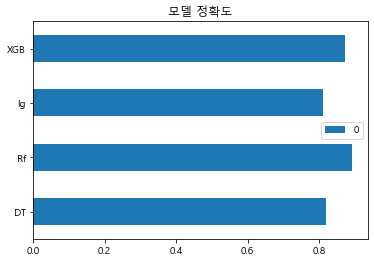

In [8]:
pd.DataFrame(result).T.plot(kind="barh",title="모델 정확도");
display(pd.DataFrame(result))

__RF__ 와 __XGB__ 가 성능이 비슷하게 검증이 되었다. 그러면 검증용 데이터에 대해서는 어떻게 평가가 되는지 확인해본다.

### 4.1.3 검증용 데이터셋 평가

In [9]:
xgb_model = XGBClassifier(max_depth =3,random_state=42)
rf_model = RandomForestClassifier(random_state=42)

In [10]:
xgb_model.fit(x_train.values,y_train)
rf_model.fit(x_train.values,y_train)

[10:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomForestClassifier(random_state=42)

In [11]:
y_pred_xgb = xgb_model.predict(x_val.values)
y_pred_rf = rf_model.predict(x_val.values)

In [12]:
print("RF")
print(classification_report(y_val, y_pred_rf))

print()
print('---------------------------')
print()
print("XGB")
print(classification_report(y_val, y_pred_xgb))


RF
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       270
           1       0.91      0.40      0.56        25
           2       0.84      0.63      0.72        51

    accuracy                           0.89       346
   macro avg       0.88      0.67      0.74       346
weighted avg       0.89      0.89      0.88       346


---------------------------

XGB
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       270
           1       0.83      0.40      0.54        25
           2       0.85      0.69      0.76        51

    accuracy                           0.89       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.89      0.89      0.88       346



### 4.1.4 테스트 데이터셋 평가

In [13]:
y_pred_xgb = xgb_model.predict(X_test.values)
y_pred_rf = rf_model.predict(X_test.values)

print("RF")
print(classification_report(y_test, y_pred_rf))

print()
print('---------------------------')
print()
print("XGB")
print(classification_report(y_test, y_pred_xgb))


RF
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       580
           1       0.82      0.60      0.70        53
           2       0.87      0.57      0.69       108

    accuracy                           0.89       741
   macro avg       0.87      0.72      0.78       741
weighted avg       0.89      0.89      0.89       741


---------------------------

XGB
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       580
           1       0.80      0.60      0.69        53
           2       0.80      0.62      0.70       108

    accuracy                           0.89       741
   macro avg       0.84      0.73      0.77       741
weighted avg       0.89      0.89      0.88       741



__결론__

재현율을 평가 측도로 보기로 하였다. 그 측면에서 보았을때 RF보다 XGB가 더 나은 재현율을 보여주고 있기에, 해당 __XGB__ 모델로 선정하기로 한다.

### 4.1.5 모델 저장

In [14]:
os.makedirs("./model/",exist_ok=True)

joblib.dump(xgb_model, './model/xgb_model_v1.1.pkl')

['./model/xgb_model_v1.1.pkl']

## 4.2 이진 분류기 성능 평가

### 4.2.1 y값 이진 값으로 변경

In [15]:
y_train1 = y_train !=0
y_val1 = y_val !=0
y_test1 = y_test !=0

### 4.2.2 최적의 모델 찾기

In [16]:
result = {}
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lg_model = LogisticRegression(random_state=42)
xgb_model = XGBClassifier(max_depth =4,random_state=42)


In [17]:
dt_score = cross_val_score(dt_model,x_train,y_train1,scoring='accuracy',cv=5)
result["DT"] = [dt_score.mean()]

dt_score = cross_val_score(rf_model,x_train,y_train1,scoring='accuracy',cv=5)
result["Rf"] = [dt_score.mean()
]
dt_score = cross_val_score(lg_model,x_train,y_train1,scoring='accuracy',cv=5)
result["lg"] =[ dt_score.mean()]

dt_score = cross_val_score(xgb_model,x_train.values,y_train1.values,scoring='accuracy',cv=5)
result["XGB"] =[ dt_score.mean()]

[10:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,DT,Rf,lg,XGB
0,0.833679,0.893695,0.852488,0.877782


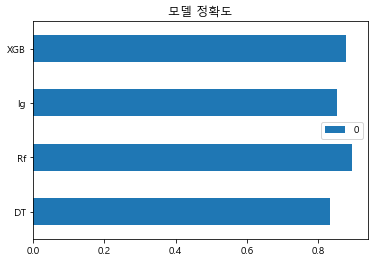

In [18]:
pd.DataFrame(result).T.plot(kind="barh",title="모델 정확도");
display(pd.DataFrame(result))

RF와 XGB 차이가 크게 발생하지 않는다. 해당 모델 전부 검증 데이터와 테스트 데이터를 통해 최적의 모델 선택하고자 한다.

### 4.2.3 검증용 데이터셋 평가

In [19]:
xgb_model_b = XGBClassifier(max_depth =4,random_state=42)
rf_model_b = RandomForestClassifier(random_state=42)

In [20]:
xgb_model_b.fit(x_train.values,y_train1)
rf_model_b.fit(x_train.values,y_train1)

[10:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomForestClassifier(random_state=42)

In [21]:
y_pred_xgb_b = xgb_model_b.predict(x_val.values)
y_pred_rf_b = rf_model_b.predict(x_val.values)

In [22]:
print("RF")
print(classification_report(y_val1, y_pred_rf_b))

print()
print('---------------------------')
print()
print("XGB")
print(classification_report(y_val1, y_pred_xgb_b))


RF
              precision    recall  f1-score   support

       False       0.89      0.98      0.93       270
        True       0.88      0.59      0.71        76

    accuracy                           0.89       346
   macro avg       0.89      0.78      0.82       346
weighted avg       0.89      0.89      0.88       346


---------------------------

XGB
              precision    recall  f1-score   support

       False       0.90      0.97      0.94       270
        True       0.87      0.63      0.73        76

    accuracy                           0.90       346
   macro avg       0.89      0.80      0.84       346
weighted avg       0.90      0.90      0.89       346



### 4.2.4 테스트 데이터셋 평가¶

In [23]:
y_pred_xgb_b = xgb_model_b.predict(X_test.values)
y_pred_rf_b = rf_model_b.predict(X_test.values)

In [24]:
print("RF")
print(classification_report(y_test1, y_pred_rf_b))

print()
print('---------------------------')
print()
print("XGB")
print(classification_report(y_test1, y_pred_xgb_b))


RF
              precision    recall  f1-score   support

       False       0.91      0.97      0.94       580
        True       0.85      0.64      0.73       161

    accuracy                           0.90       741
   macro avg       0.88      0.80      0.83       741
weighted avg       0.89      0.90      0.89       741


---------------------------

XGB
              precision    recall  f1-score   support

       False       0.91      0.96      0.94       580
        True       0.84      0.68      0.75       161

    accuracy                           0.90       741
   macro avg       0.88      0.82      0.84       741
weighted avg       0.90      0.90      0.90       741



__결론__

Feature를 줄이기 이전과 이후의 재현율의 성능 차이는 0.67 -> 0.68로 약 0.01 정도 차이가 난다. 적은 feature를 사용해 성능 평가를 진행했을때가 더 나은 결과를 도출해주고 있다.

### 4.2.5 모델 저장

In [25]:
joblib.dump(xgb_model_b, './model/xgb_model_binary_v1.1.pkl')

['./model/xgb_model_binary_v1.1.pkl']

# 5. 기여도 알아보기

## 5.1 Shap value를 이용한 XAI

In [26]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(xgb_model_b)
shap_values = explainer.shap_values(x_train.values)

In [27]:
# 컬럼명 저장
columns1 = list(x_train)

In [28]:
# 예측값 저장
y_pred = xgb_model_b.predict(x_train.values)

In [29]:
idx = 2
print(f"실제 y 값 : {y_train.values[idx]}  예측값 : {y_pred[idx]}  (1 : 광고, 0 : 순수)")
shap.force_plot(explainer.expected_value,
               shap_values[idx, :],
               x_train.iloc[idx,:], link='logit') # link='logit'

실제 y 값 : 0  예측값 : False  (1 : 광고, 0 : 순수)


In [30]:
idx = 356
print(f"실제 y 값 : {y_train.values[idx]}  예측값 : {y_pred[idx]} (1 : 광고, 0 : 순수)")
shap.force_plot(explainer.expected_value,
               shap_values[idx, :],
                x_train.iloc[idx,:], link='logit') # link='logit'

실제 y 값 : 0  예측값 : False (1 : 광고, 0 : 순수)


### 5.1.1 Feature 기여도 확인

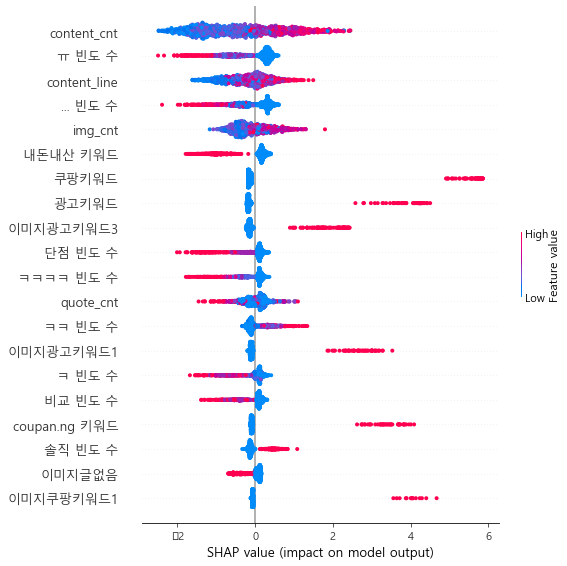

In [31]:
shap.summary_plot(shap_values,x_train.values,feature_names=columns1)